In [1]:
import pandas as pd
%run md_utils.py

In [2]:
J = "jaccard_score"
FP = "num_false_positives"
FN = "num_false_negatives"
PRECISION = "precision"
RECALL = "recall"
F1 = "f1_score"
COMPLEXITY = "len_shortest_explanation"
NUMERIC = [J, F1, PRECISION, RECALL, FP, FN, COMPLEXITY]

In [3]:
src_df=pd.read_csv("../data/results.tsv", sep="\t")

In [4]:
src_df.query("completed == False")

,name,completed,task_name,task_type,task_obfuscated,method,model,description,answers,prompt,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation


## Filter empty... these should not exist TODO

In [5]:
# src_df.query("jaccard_score == 'None'")

In [6]:
invalid_rows = src_df[pd.to_numeric(src_df['jaccard_score'], errors='coerce').isna()]
invalid_rows

,name,completed,task_name,task_type,task_obfuscated,method,model,description,answers,prompt,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
444,name,completed,task_name,task_type,task_obfuscated,method,model,description,answers,prompt,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation


In [7]:
invalid_rows.groupby(["model", "task_type"]).count()

,,name,completed,task_name,task_obfuscated,method,description,answers,prompt,completion,jaccard_score,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
model,task_type,,,,,,,,,,,,,,,,,,,,
model,task_type,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
df = src_df.query("jaccard_score != 'None'")

In [9]:
for c in NUMERIC:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [10]:
invalid_rows = df[pd.to_numeric(df['jaccard_score'], errors='coerce').isna()]
invalid_rows

,name,completed,task_name,task_type,task_obfuscated,method,model,description,answers,prompt,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
444,name,completed,task_name,task_type,task_obfuscated,method,model,description,answers,prompt,...,false_positives,false_negatives,NaN,NaN,num_true_positives,num_true_negatives,NaN,NaN,NaN,NaN


In [11]:
df.describe()

,jaccard_score,num_false_positives,num_false_negatives,precision,recall,f1_score,len_shortest_explanation
count,888.000000,876.000000,876.000000,888.000000,876.000000,876.000000,876.000000
mean,0.485011,0.930365,1.263699,0.567198,0.532218,0.534470,2.554795
std,0.433244,1.588081,2.123632,0.459036,0.444540,0.435844,2.258791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.500000,1.000000,1.000000,0.800000,0.666667,0.666667,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,15.000000,21.000000,1.000000,1.000000,1.000000,11.000000


In [12]:
df[["task_type"]].drop_duplicates().style.hide()

task_type
TaxonConstraintTask
EntailedIndirectSuperClassTask
EntailedTransitiveSuperClassTask
MostRecentCommonSubsumerTask
EntailedSubClassOfExpressionTask
OntologyCoherencyTask
ABoxTask
task_type


In [13]:
df['correct'] = df.apply(lambda row: row.num_false_positives + row.num_false_negatives == 0, axis=1)

In [14]:
GROUPS = ["task_type", "method", "model"]

In [15]:
df.groupby(GROUPS).count()

name   
task_type                        method           model                 
ABoxTask                         basic            gpt-3.5-turbo    29  \
                                                  gpt-4            29   
                                 chain_of_thought gpt-3.5-turbo    29   
                                                  gpt-4            29   
                                 explanation      gpt-3.5-turbo    29   
                                                  gpt-4            29   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo    19   
                                                  gpt-4            19   
                                 chain_of_thought gpt-3.5-turbo    19   
                                                  gpt-4            19   
                                 explanation      gpt-3.5-turbo    19   
                                                  gpt-4            19   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
OntologyCoherencyTask            basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
TaxonConstraintTask              basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
task_type                        method           model             1   

                                                                 completed   
task_type                        method           model                      
ABoxTask                         basic            gpt-3.5-turbo         29  \
                                                  gpt-4                 29   
                                 chain_of_thought gpt-3.5-turbo         29   
                                                  gpt-4                 29   
                                 explanation      gpt-3.5-turbo         29   
                                                  gpt-4                 29   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo         20   
                                                  gpt-4                 20   

In [16]:
df.groupby(GROUPS).max(numeric_only=True)

jaccard_score   
task_type                        method           model                          
ABoxTask                         basic            gpt-3.5-turbo            1.0  \
                                                  gpt-4                    1.0   
                                 chain_of_thought gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 explanation      gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 chain_of_thought gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 explanation      gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 chain_of_thought gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 explanation      gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 chain_of_thought gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 explanation      gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 chain_of_thought gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 explanation      gpt-3.5-turbo            0.5   
                                                  gpt-4                    1.0   
OntologyCoherencyTask            basic            gpt-3.5-turbo            0.0   
                                                  gpt-4                    0.0   
                                 chain_of_thought gpt-3.5-turbo            0.0   
                                                  gpt-4                    0.0   
                                 explanation      gpt-3.5-turbo            0.0   
                                                  gpt-4                    0.0   
TaxonConstraintTask              basic            gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 chain_of_thought gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
                                 explanation      gpt-3.5-turbo            1.0   
                                                  gpt-4                    1.0   
task_type                        method           model                    NaN   

                                                                 num_false_positives   
task_type                        method           model                                
ABoxTask                         basic            gpt-3.5-turbo                 10.0  \
                                                  gpt-4                          0.0   
                      

In [17]:
df.groupby(GROUPS).min(numeric_only=True)

jaccard_score   
task_type                        method           model                          
ABoxTask                         basic            gpt-3.5-turbo       0.000000  \
                                                  gpt-4               1.000000   
                                 chain_of_thought gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 explanation      gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.714286   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 chain_of_thought gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 explanation      gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.111111   
                                 chain_of_thought gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.111111   
                                 explanation      gpt-3.5-turbo       0.142857   
                                                  gpt-4               0.181818   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo       0.333333   
                                                  gpt-4               0.500000   
                                 chain_of_thought gpt-3.5-turbo       0.055556   
                                                  gpt-4               0.285714   
                                 explanation      gpt-3.5-turbo       0.240000   
                                                  gpt-4               0.500000   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 chain_of_thought gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 explanation      gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
OntologyCoherencyTask            basic            gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 chain_of_thought gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 explanation      gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
TaxonConstraintTask              basic            gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 chain_of_thought gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 explanation      gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
task_type                        method           model                    NaN   

                                                                 num_false_positives   
task_type                        method           model                                
ABoxTask                         basic            gpt-3.5-turbo                  0.0  \
                                                  gpt-4                          0.0   
                      

In [18]:
df.groupby(GROUPS).mean(numeric_only=True)

jaccard_score   
task_type                        method           model                          
ABoxTask                         basic            gpt-3.5-turbo       0.586118  \
                                                  gpt-4               1.000000   
                                 chain_of_thought gpt-3.5-turbo       0.241708   
                                                  gpt-4               0.876847   
                                 explanation      gpt-3.5-turbo       0.503448   
                                                  gpt-4               0.990148   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo       0.569554   
                                                  gpt-4               0.811023   
                                 chain_of_thought gpt-3.5-turbo       0.418581   
                                                  gpt-4               0.669375   
                                 explanation      gpt-3.5-turbo       0.395340   
                                                  gpt-4               0.647889   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo       0.630393   
                                                  gpt-4               0.782379   
                                 chain_of_thought gpt-3.5-turbo       0.515374   
                                                  gpt-4               0.550440   
                                 explanation      gpt-3.5-turbo       0.658326   
                                                  gpt-4               0.779089   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo       0.697389   
                                                  gpt-4               0.935646   
                                 chain_of_thought gpt-3.5-turbo       0.469468   
                                                  gpt-4               0.700213   
                                 explanation      gpt-3.5-turbo       0.562126   
                                                  gpt-4               0.934330   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo       0.060000   
                                                  gpt-4               0.150000   
                                 chain_of_thought gpt-3.5-turbo       0.100000   
                                                  gpt-4               0.150000   
                                 explanation      gpt-3.5-turbo       0.025000   
                                                  gpt-4               0.175000   
OntologyCoherencyTask            basic            gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 chain_of_thought gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
                                 explanation      gpt-3.5-turbo       0.000000   
                                                  gpt-4               0.000000   
TaxonConstraintTask              basic            gpt-3.5-turbo       0.550000   
                                                  gpt-4               0.750000   
                                 chain_of_thought gpt-3.5-turbo       0.550000   
                                                  gpt-4               0.300000   
                                 explanation      gpt-3.5-turbo       0.575000   
                                                  gpt-4               0.550000   
task_type                        method           model                    NaN   

                                                                 num_false_positives   
task_type                        method           model                                
ABoxTask                         basic            gpt-3.5-turbo             1.517241  \
                                                  gpt-4                     0.000000   
                      

In [19]:
main_summary_table = df.groupby(GROUPS).mean(numeric_only=True).reset_index()
print(main_summary_table[ GROUPS + [F1]].to_markdown("main_summary_table.md", index=False))
main_summary_table[ GROUPS + [F1]]

None


,task_type,method,model,f1_score
0,ABoxTask,basic,gpt-3.5-turbo,0.642144
1,ABoxTask,basic,gpt-4,1.000000
2,ABoxTask,chain_of_thought,gpt-3.5-turbo,0.305337
3,ABoxTask,chain_of_thought,gpt-4,0.894253
4,ABoxTask,explanation,gpt-3.5-turbo,0.571429
5,ABoxTask,explanation,gpt-4,0.994253
6,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,0.739145
7,EntailedIndirectSuperClassTask,basic,gpt-4,0.940078
8,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,0.587469
9,EntailedIndirectSuperClassTask,chain_of_thought,gpt-4,0.814255


In [20]:
cmap = {
   "ABoxTask": "abox",
    "EntailedIndirectSuperClassTask": "inds",
    "EntailedSubClassOfExpressionTask": "expr",
    "EntailedTransitiveSuperClassTask": "sup",
    "MostRecentCommonSubsumerTask": "mrca",
    "OntologyCoherencyTask": "sat",
    "TaxonConstraintTask": "tc",
}
tmap = {
    "basic": "basic",
    "chain_of_thought": "cot",
    "explanation": "expl",
}

In [21]:
df[["task_type"]]

,task_type
0,TaxonConstraintTask
1,TaxonConstraintTask
2,TaxonConstraintTask
3,TaxonConstraintTask
4,TaxonConstraintTask
...,...
884,ABoxTask
885,ABoxTask
886,ABoxTask
887,ABoxTask


In [22]:
df["task"] = df.apply(lambda row: cmap.get(row["task_type"], "unknown"), axis=1)

In [23]:
df["mthd"] = df.apply(lambda row: tmap.get(row["method"], "unknown"), axis=1)
pv_pivot = df.pivot_table(index=["model", "mthd"], columns="task", values=F1)
as_md_table(pv_pivot.reset_index(), "table-main-results.md")
pv_pivot.style.highlight_max(axis=0, props='font-weight:bold').format(precision=3)

In [24]:
pv_pivot

task                     abox      expr      inds      mrca  sat       sup   
model         mthd                                                           
gpt-3.5-turbo basic  0.642144  0.718349  0.739145  0.066667  0.0  0.805197  \
              cot    0.305337  0.623445  0.587469  0.100000  0.0  0.583613   
              expl   0.571429  0.755769  0.561746  0.033333  0.0  0.689350   
gpt-4         basic  1.000000  0.843523  0.940078  0.150000  0.0  0.961280   
              cot    0.894253  0.664346  0.814255  0.150000  0.0  0.794363   
              expl   0.994253  0.848604  0.813462  0.183333  0.0  0.960348   

task                       tc  
model         mthd             
gpt-3.5-turbo basic  0.550000  
              cot    0.550000  
              expl   0.616667  
gpt-4         basic  0.750000  
              cot    0.300000  
              expl   0.550000

In [25]:
type(pv_pivot.style.highlight_max(axis=0, props='font-weight:bold').format(precision=3))

pandas.io.formats.style.Styler

In [26]:
# pd.set_option("display.precision", 8)
# pv_pivot.reset_index()
# pv_pivot.reset_index()[["model", "mthd"] + list(cmap.values()) ].to_markdown("results.md", index=False, floatfmt=".3f")

# pv_pivot.style.highlight_max(axis=0, props='font-weight:bold').format(precision=3).to_html("results.html")

## Correlation

In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

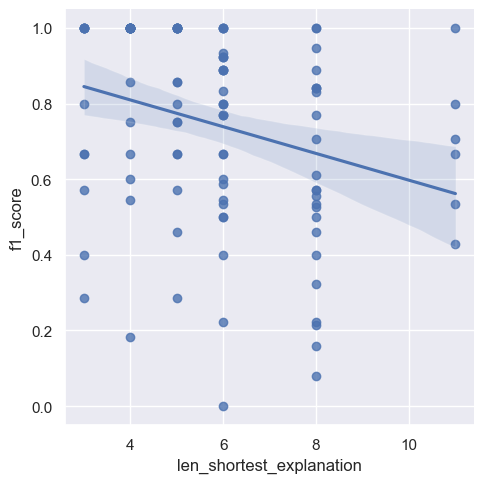

In [28]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df.query("task_type == 'EntailedIndirectSuperClassTask'"))
plt.show()

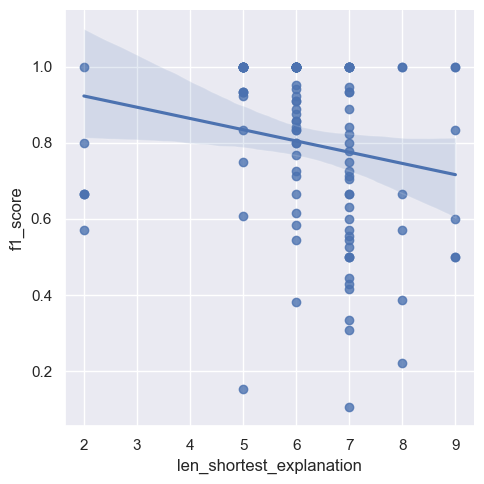

In [29]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df.query("task_type == 'EntailedTransitiveSuperClassTask'"))
plt.show()

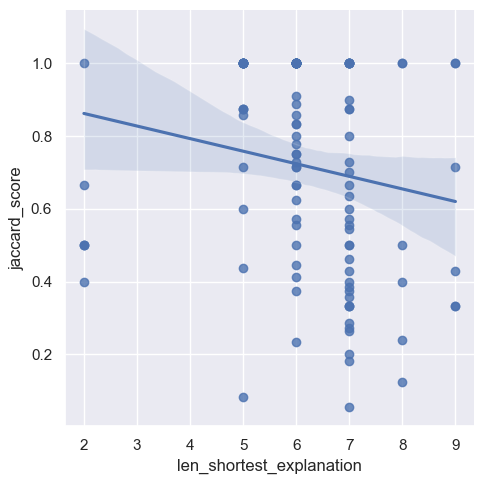

In [30]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=J, data=df.query("task_type == 'EntailedTransitiveSuperClassTask'"))
plt.show()

## GPT-4 performance on transitivity task does not degrade with complexity

In [31]:
df_tr_4 = data=df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-4'")
df_tr_3 = data=df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-3.5-turbo'")

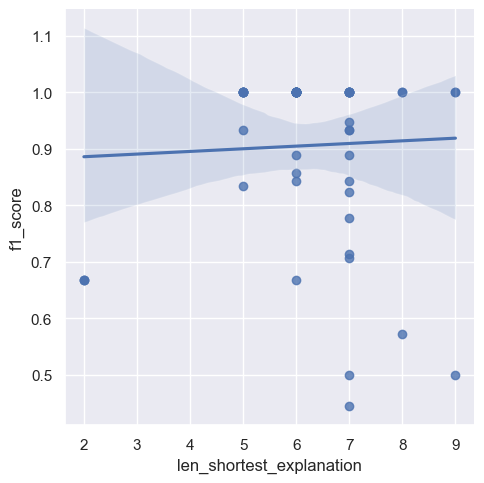

In [32]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df_tr_4)
plt.show()

Note: many of the dots are multiple data points with the same values; GPT-4 frequently gives the same results for the same task across all 3 methods

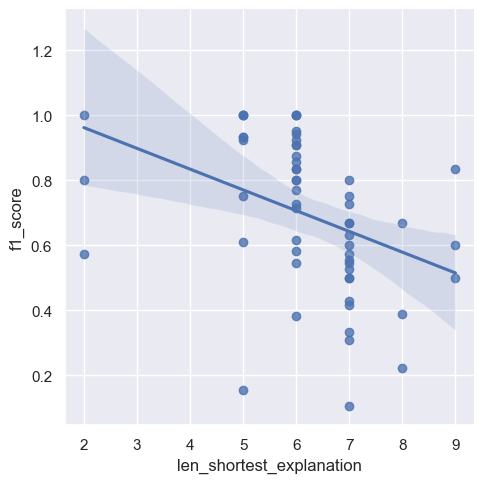

In [33]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df_tr_3)
plt.show()

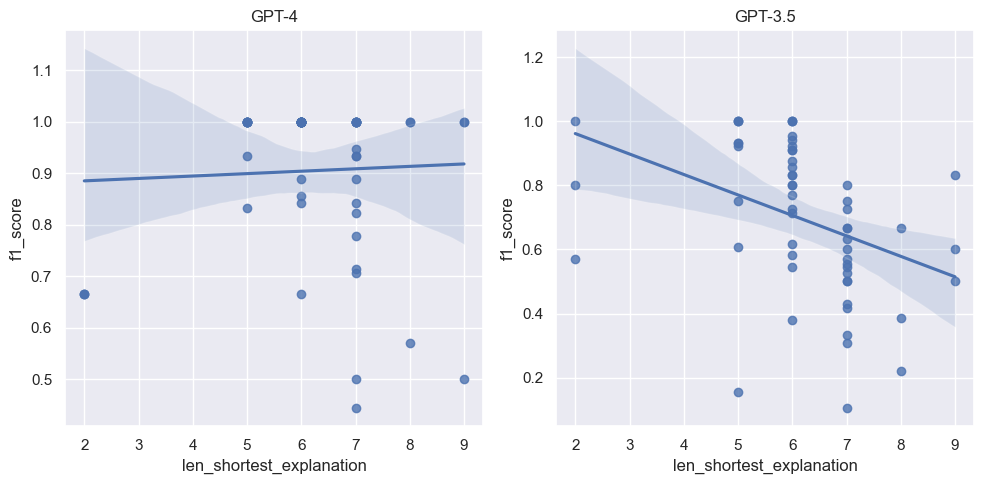

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns

x=COMPLEXITY
y=F1

# First scatter plot
sns.regplot(data=df_tr_4, x=x, y=y, ax=ax[0]) 
# sns.lmplot(data=df_tr_4, x=x, y=y, ax=ax[0]) 
ax[0].set_title('GPT-4')

# Second scatter plot
sns.regplot(data=df_tr_3, x=x, y=y, ax=ax[1]) 
ax[1].set_title('GPT-3.5')

# display the plot
plt.tight_layout()
plt.savefig(f"../content/images/complexity-scatter-plot.pdf", format='pdf')
plt.savefig(f"../content/images/complexity-scatter-plot.png", format='png')

plt.show()










<Axes: xlabel='len_shortest_explanation', ylabel='f1_score'>

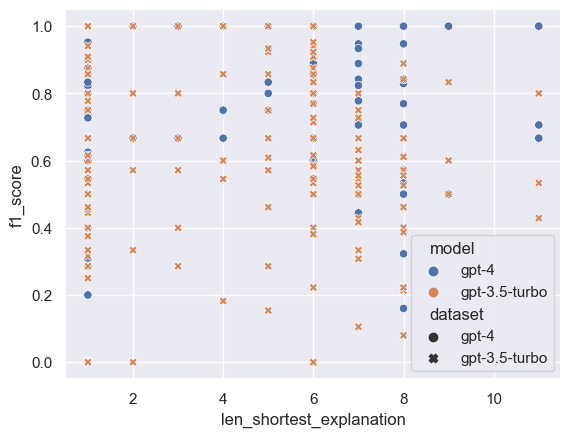

In [35]:
dftups = [(model, df.query(f"model=='{model}'")) for model in ["gpt-4", "gpt-3.5-turbo"]]
for m, mdf in dftups:
    mdf.assign(dataset=m)
concatenated = pd.concat([mdf.assign(dataset=m) for m, mdf in dftups])
sns.scatterplot(x=COMPLEXITY, y=F1, data=concatenated, style='dataset', hue='model')

In [36]:
df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-4' and len_shortest_explanation == 2")

,name,completed,task_name,task_type,task_obfuscated,method,model,description,answers,prompt,...,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation,correct,task,mthd
619,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,False,basic,gpt-4,NaN,"[{'text': 'Process', 'explanations': None}, {'...",\n\n\nI will provide an ontology as a list of ...,...,0.0,2,NaN,0.5,1.0,0.666667,2.0,False,sup,basic
620,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,False,explanation,gpt-4,NaN,"[{'text': 'Process', 'explanations': [{'axioms...",\n\n\nI will provide an ontology as a list of ...,...,0.0,2,NaN,0.5,1.0,0.666667,2.0,False,sup,expl
621,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,False,chain_of_thought,gpt-4,NaN,"[{'text': 'Occurrent', 'explanations': [{'axio...",\n\n\nI will provide an ontology as a list of ...,...,0.0,2,NaN,0.5,1.0,0.666667,2.0,False,sup,cot


In [37]:
df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-3.5-turbo' and len_shortest_explanation == 2")

,name,completed,task_name,task_type,task_obfuscated,method,model,description,answers,prompt,...,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation,correct,task,mthd
174,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,False,basic,gpt-3.5-turbo,NaN,"[{'text': 'Process', 'explanations': None}, {'...",\n\n\nI will provide an ontology as a list of ...,...,0.0,2,NaN,0.666667,1.0,0.800000,2.0,False,sup,basic
175,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,False,explanation,gpt-3.5-turbo,NaN,"[{'text': 'Occurrent', 'explanations': [{'axio...",\n\n\nI will provide an ontology as a list of ...,...,0.0,2,NaN,1.000000,1.0,1.000000,2.0,True,sup,expl
176,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,False,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'Process', 'explanations': [{'axioms...",\n\n\nI will provide an ontology as a list of ...,...,0.0,2,NaN,0.400000,1.0,0.571429,2.0,False,sup,cot


In [38]:
obf_df4=pd.read_csv("../data/results-obf-20-gpt-4.tsv", sep="\t")
obf_df3=pd.read_csv("../data/results-obf-20.tsv", sep="\t")
obf_df = pd.concat([obf_df3, obf_df4])

In [39]:
obf_df.groupby(GROUPS).mean(numeric_only=True)

completed   
task_type                        method           model                      
ABoxTask                         basic            gpt-3.5-turbo        0.0  \
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        0.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        0.0   
                                                  gpt-4                1.0   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
OntologyCoherencyTask            basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   

                                                                 task_obfuscated   
task_type                        method           model                            
ABoxTask                         basic            gpt-3.5-turbo              0.0  \
                                                  gpt-4                      0.0   
                                 chain_of_thought gpt-3.5-turbo              0.0   
                                                  gpt-4                      0.0   
                                 explanation      gpt-3.5-turbo              0.0   
                                                  gpt-4                      0.0   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo              0.0   
                                                  gpt-4                      0.0   
                                 chain_of_thought gpt-3.5-turbo              0.0   
                                                  gpt-4                      0.0   
                                 explanation      gpt-3.5-turbo              0.0   
        

In [40]:
obf_df["task"] = obf_df.apply(lambda row: cmap[row["task_type"]], axis=1)
obf_df["mthd"] = obf_df.apply(lambda row: tmap.get(row["method"], "unknown"), axis=1)
pv_pivot = obf_df.pivot_table(index=["model", "method"], columns="task", values=F1)
as_md_table(pv_pivot.reset_index(), "table-obfuscated-results.md")
pv_pivot.style.highlight_max(axis=0, props='font-weight:bold').format(precision=3)

In [41]:
#pv_pivot.style.highlight_max(axis=0, props='font-weight:bold').format(precision=3).to_html("results_obfuscated.html")